In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['figure.dpi'] = 500
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report , confusion_matrix
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (10,5)

# 1 - Business Problem

<h3 style="color:blue; font-family: Arial;">A cloth manufacturing company is interested to know about the segment or attributes causes high sale. </h3>

# 2 - Data collection and description

In [2]:
df = pd.read_csv("Company_Data.csv")
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


<h3 style="color:black; font-family: Arial;"> Data processing</h3>

In [3]:
df=pd.get_dummies(df,columns=['ShelveLoc','Urban','US'], drop_first=True)
df

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,17,False,False,True,True
1,11.22,111,48,16,260,83,65,10,True,False,True,True
2,10.06,113,35,10,269,80,59,12,False,True,True,True
3,7.40,117,100,4,466,97,55,14,False,True,True,True
4,4.15,141,64,3,340,128,38,13,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,True,False,True,True
396,6.14,139,23,3,37,120,55,11,False,True,False,True
397,7.41,162,26,12,368,159,40,18,False,True,True,True
398,5.94,100,79,7,284,95,50,12,False,False,True,True


In [4]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
df.isnull().sum()

Sales               0
CompPrice           0
Income              0
Advertising         0
Population          0
Price               0
Age                 0
Education           0
ShelveLoc_Good      0
ShelveLoc_Medium    0
Urban_Yes           0
US_Yes              0
dtype: int64

In [6]:
df.dtypes

Sales               float64
CompPrice             int64
Income                int64
Advertising           int64
Population            int64
Price                 int64
Age                   int64
Education             int64
ShelveLoc_Good         bool
ShelveLoc_Medium       bool
Urban_Yes              bool
US_Yes                 bool
dtype: object

# 3- Visualization

<Axes: xlabel='Age', ylabel='Sales'>

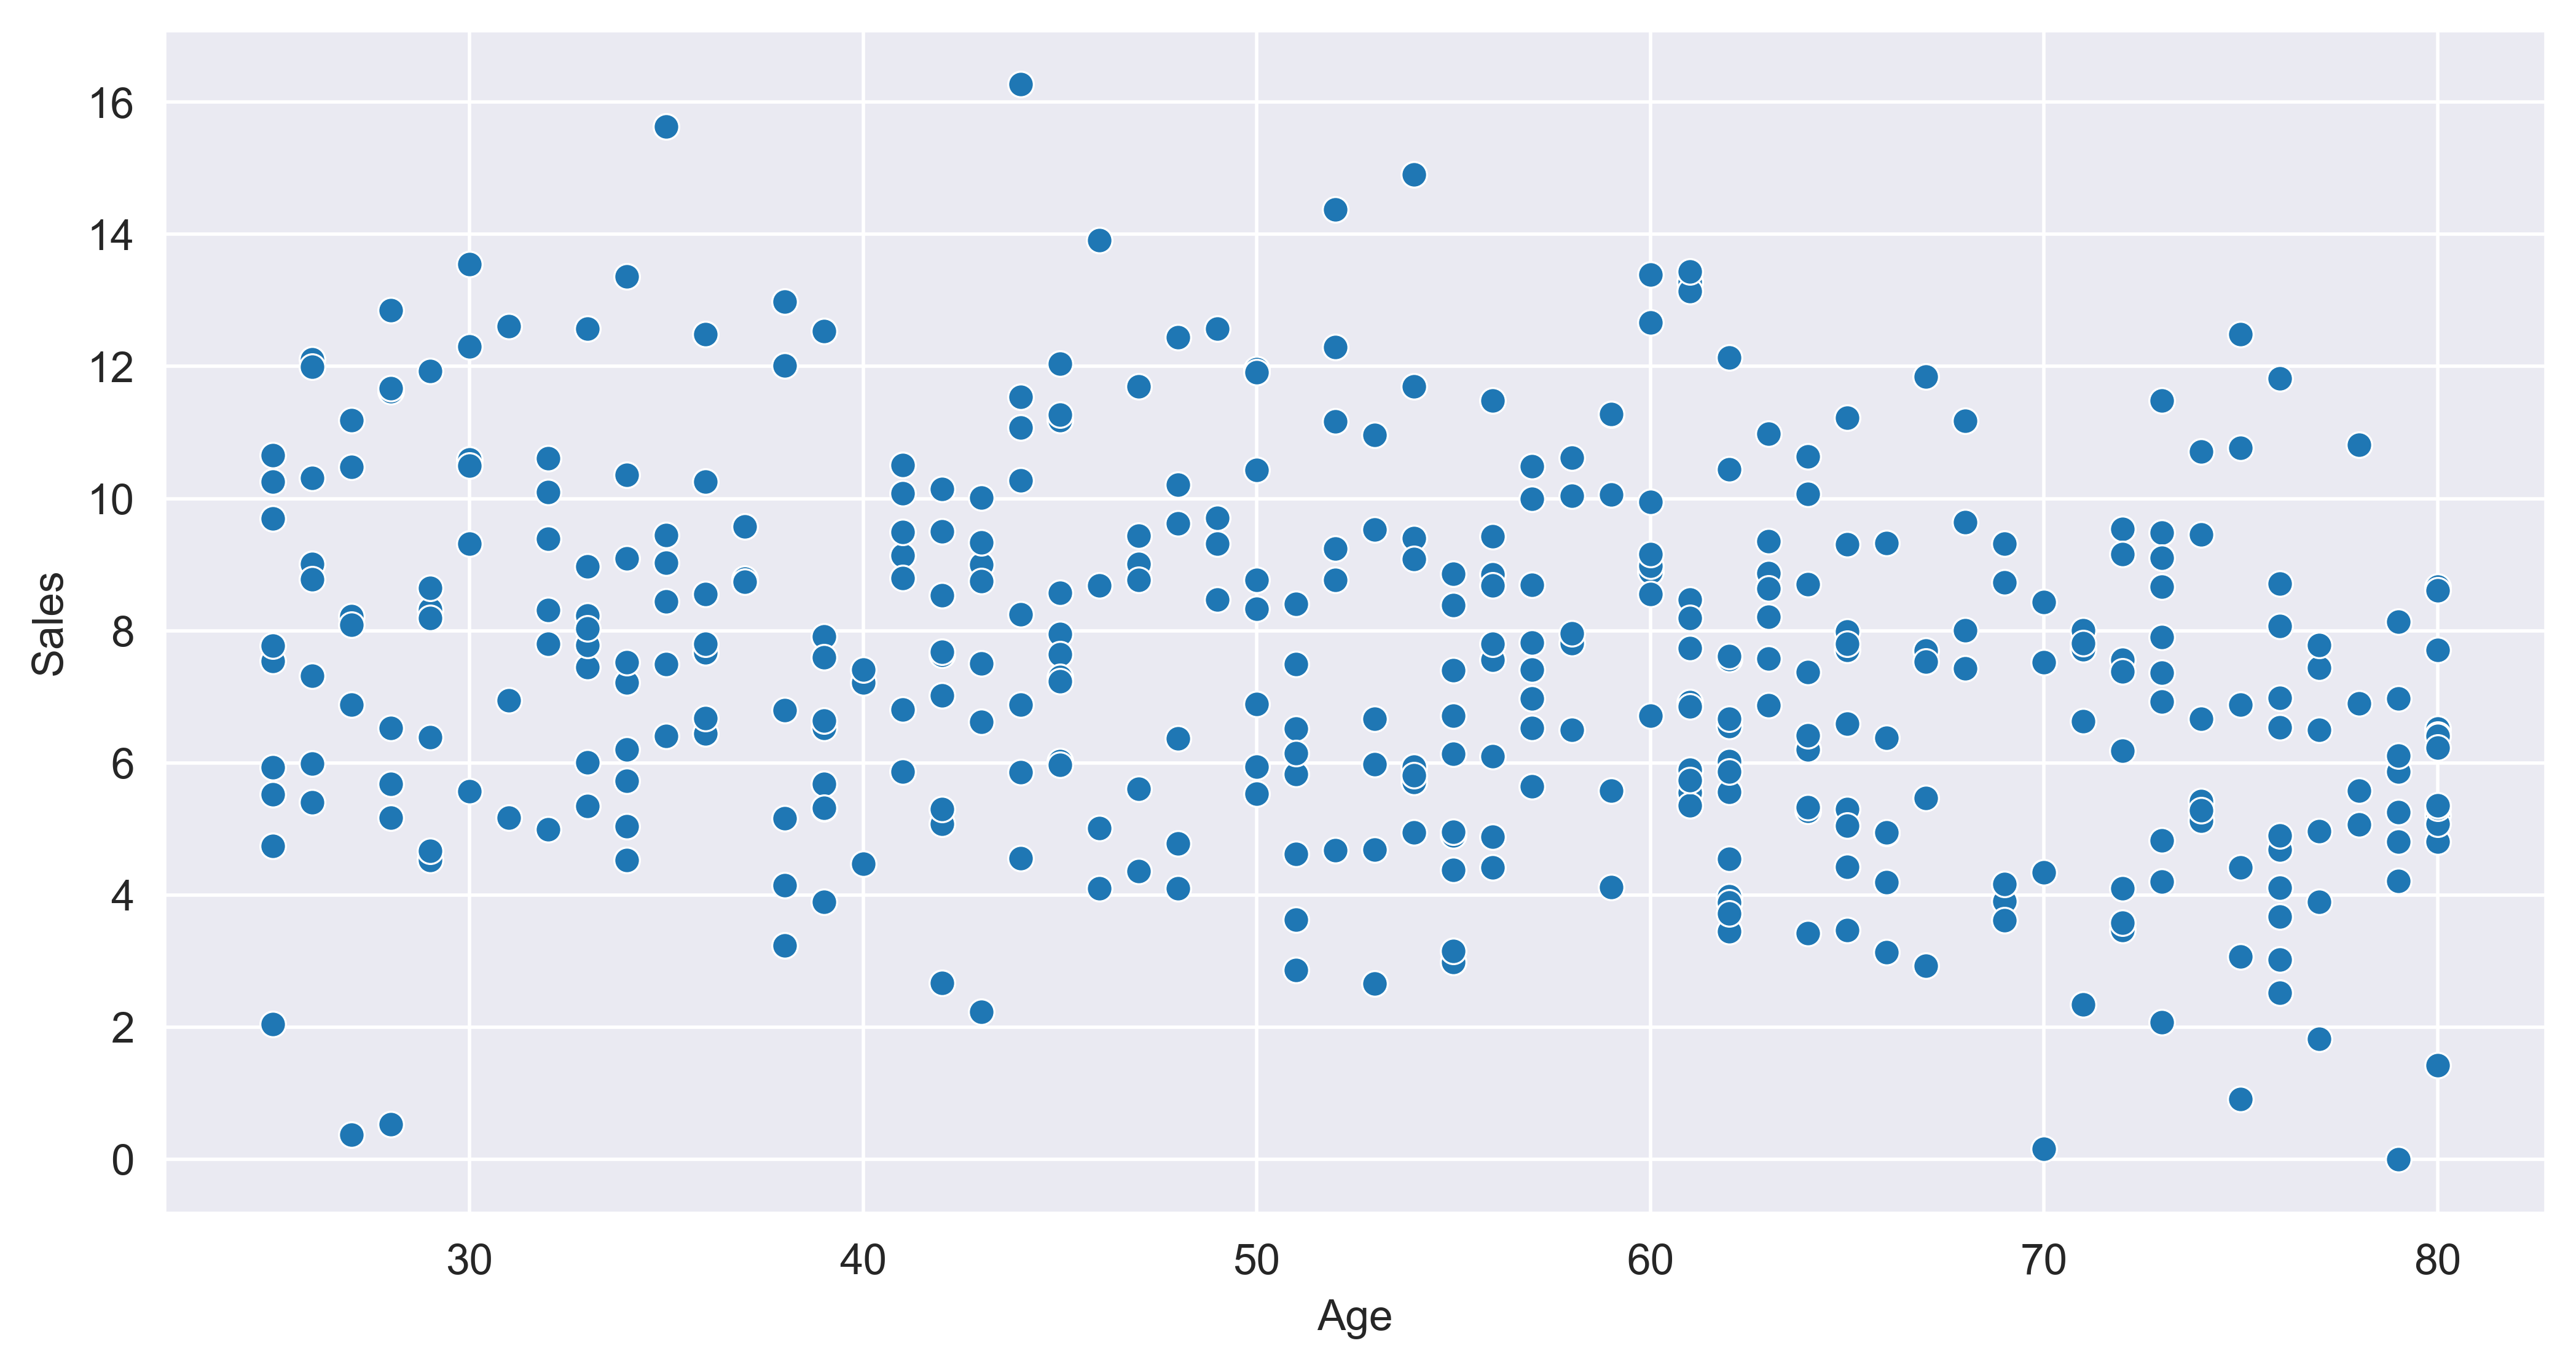

In [7]:
sns.scatterplot(x=df['Age'],y=df['Sales'])

<Axes: xlabel='CompPrice', ylabel='Sales'>

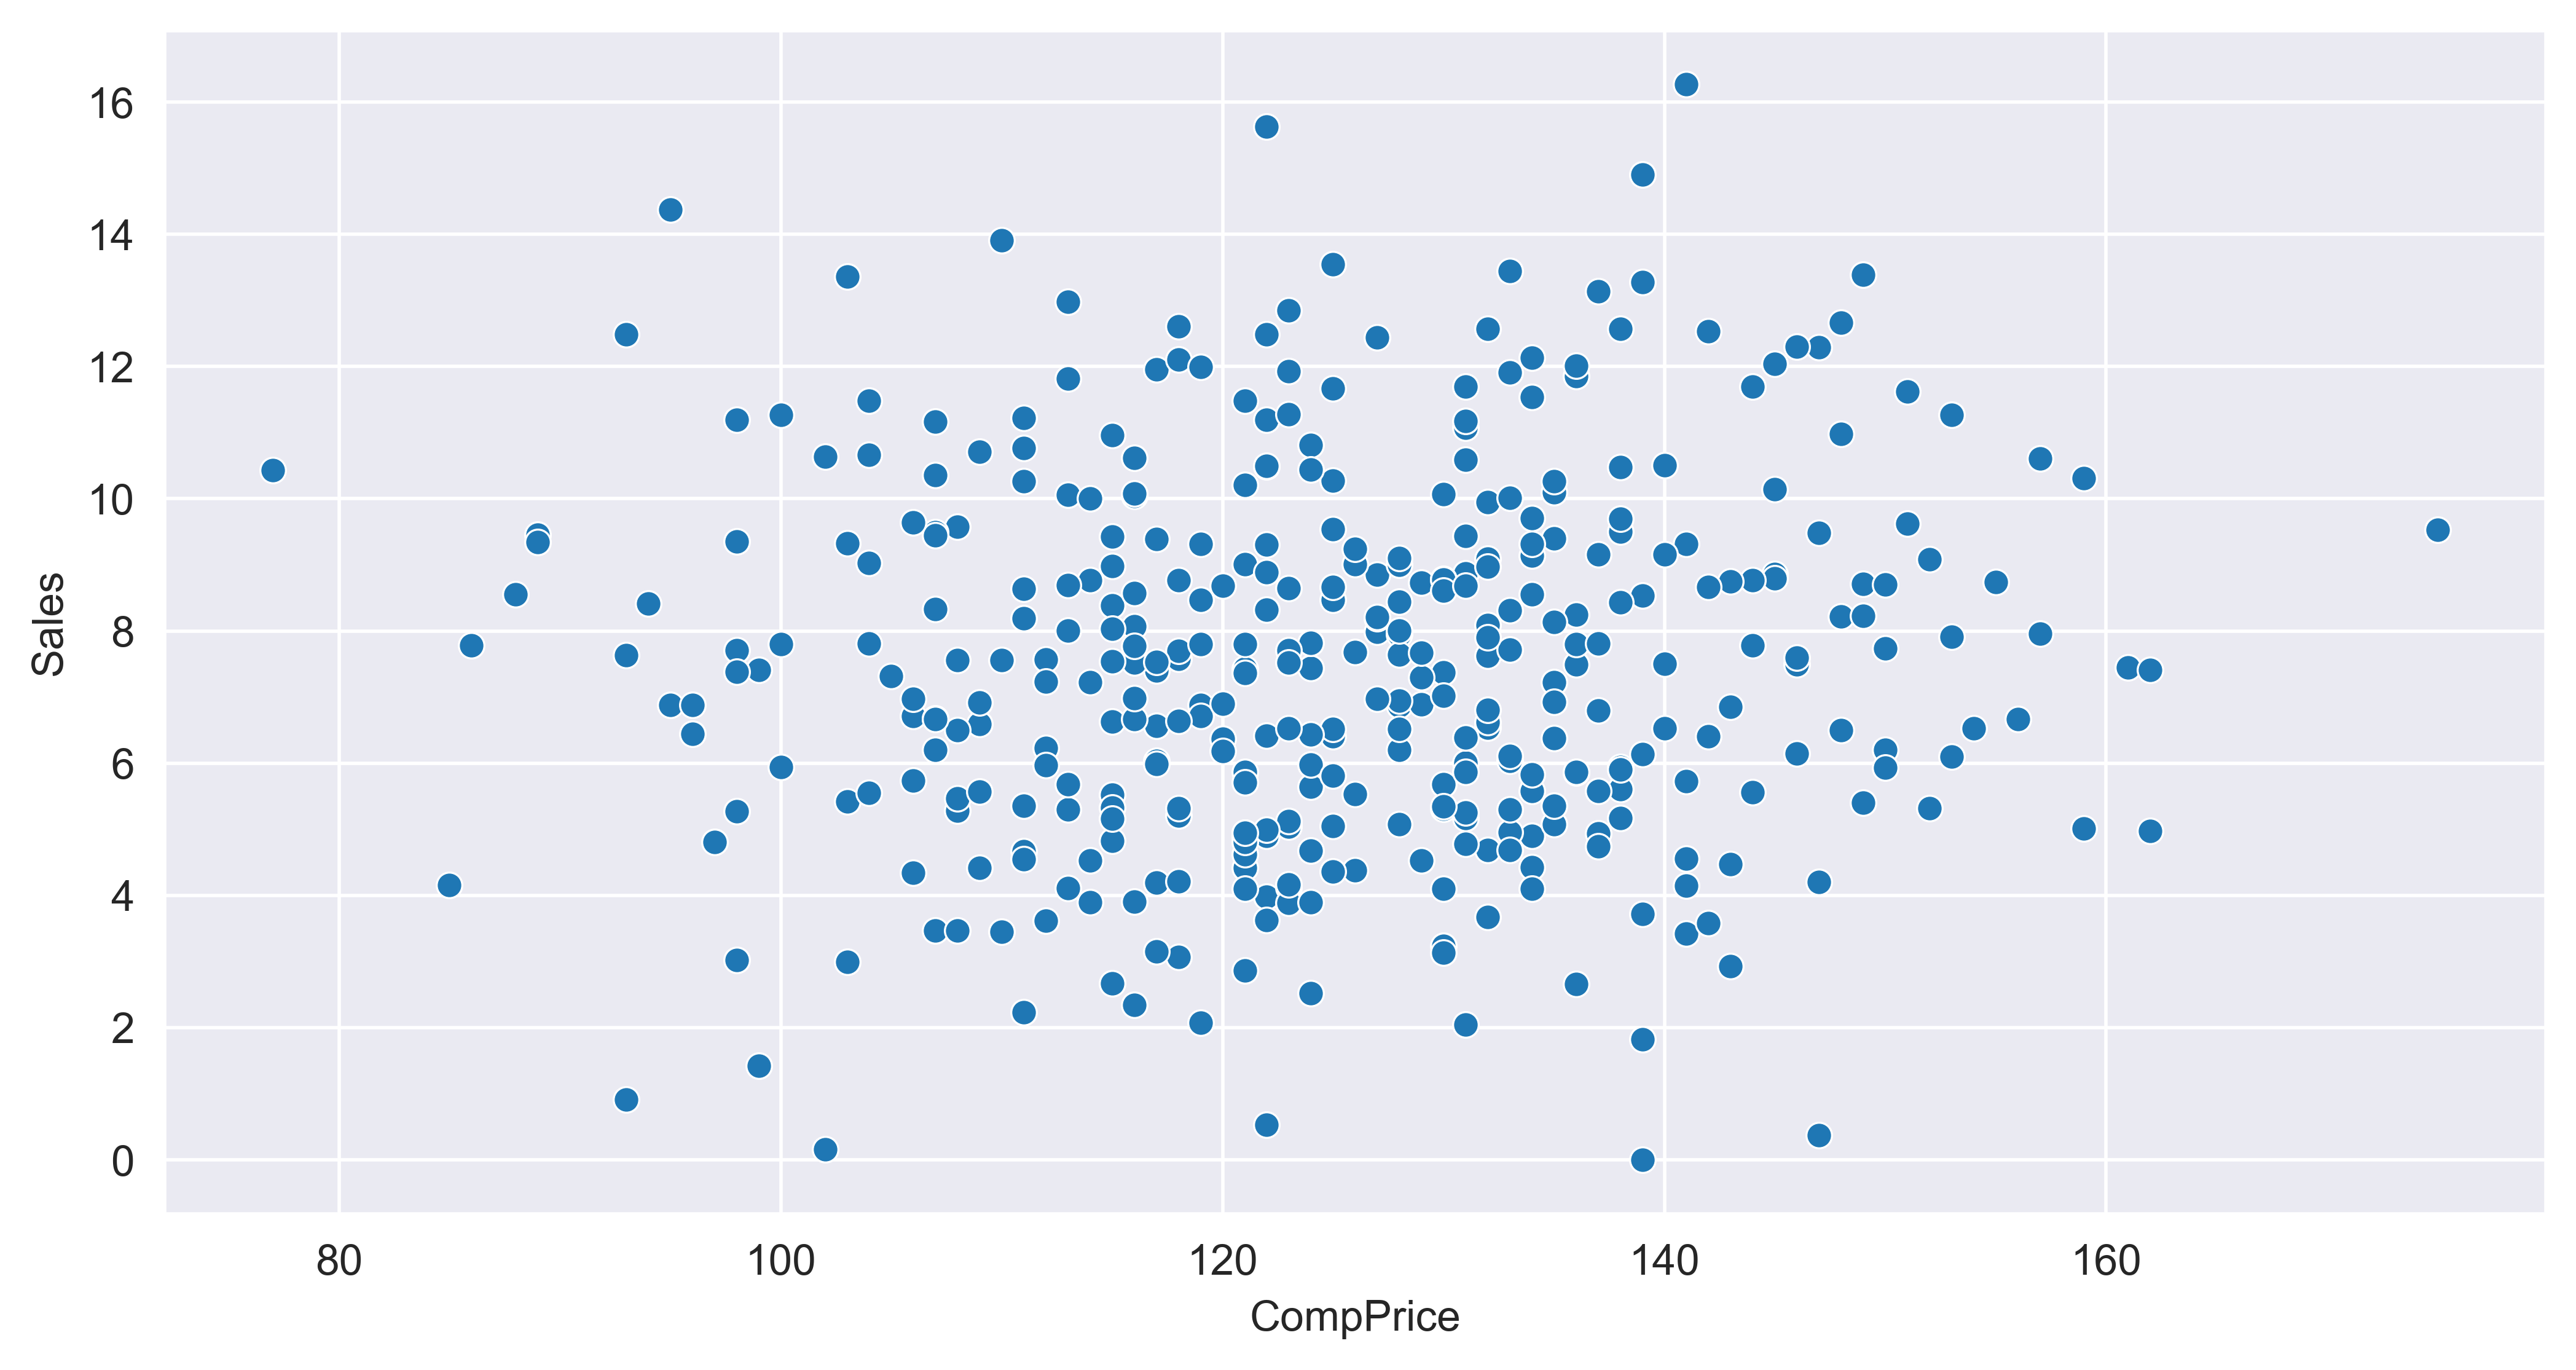

In [8]:
sns.scatterplot(x=df['CompPrice'],y=df['Sales'])

<Axes: xlabel='Population', ylabel='Sales'>

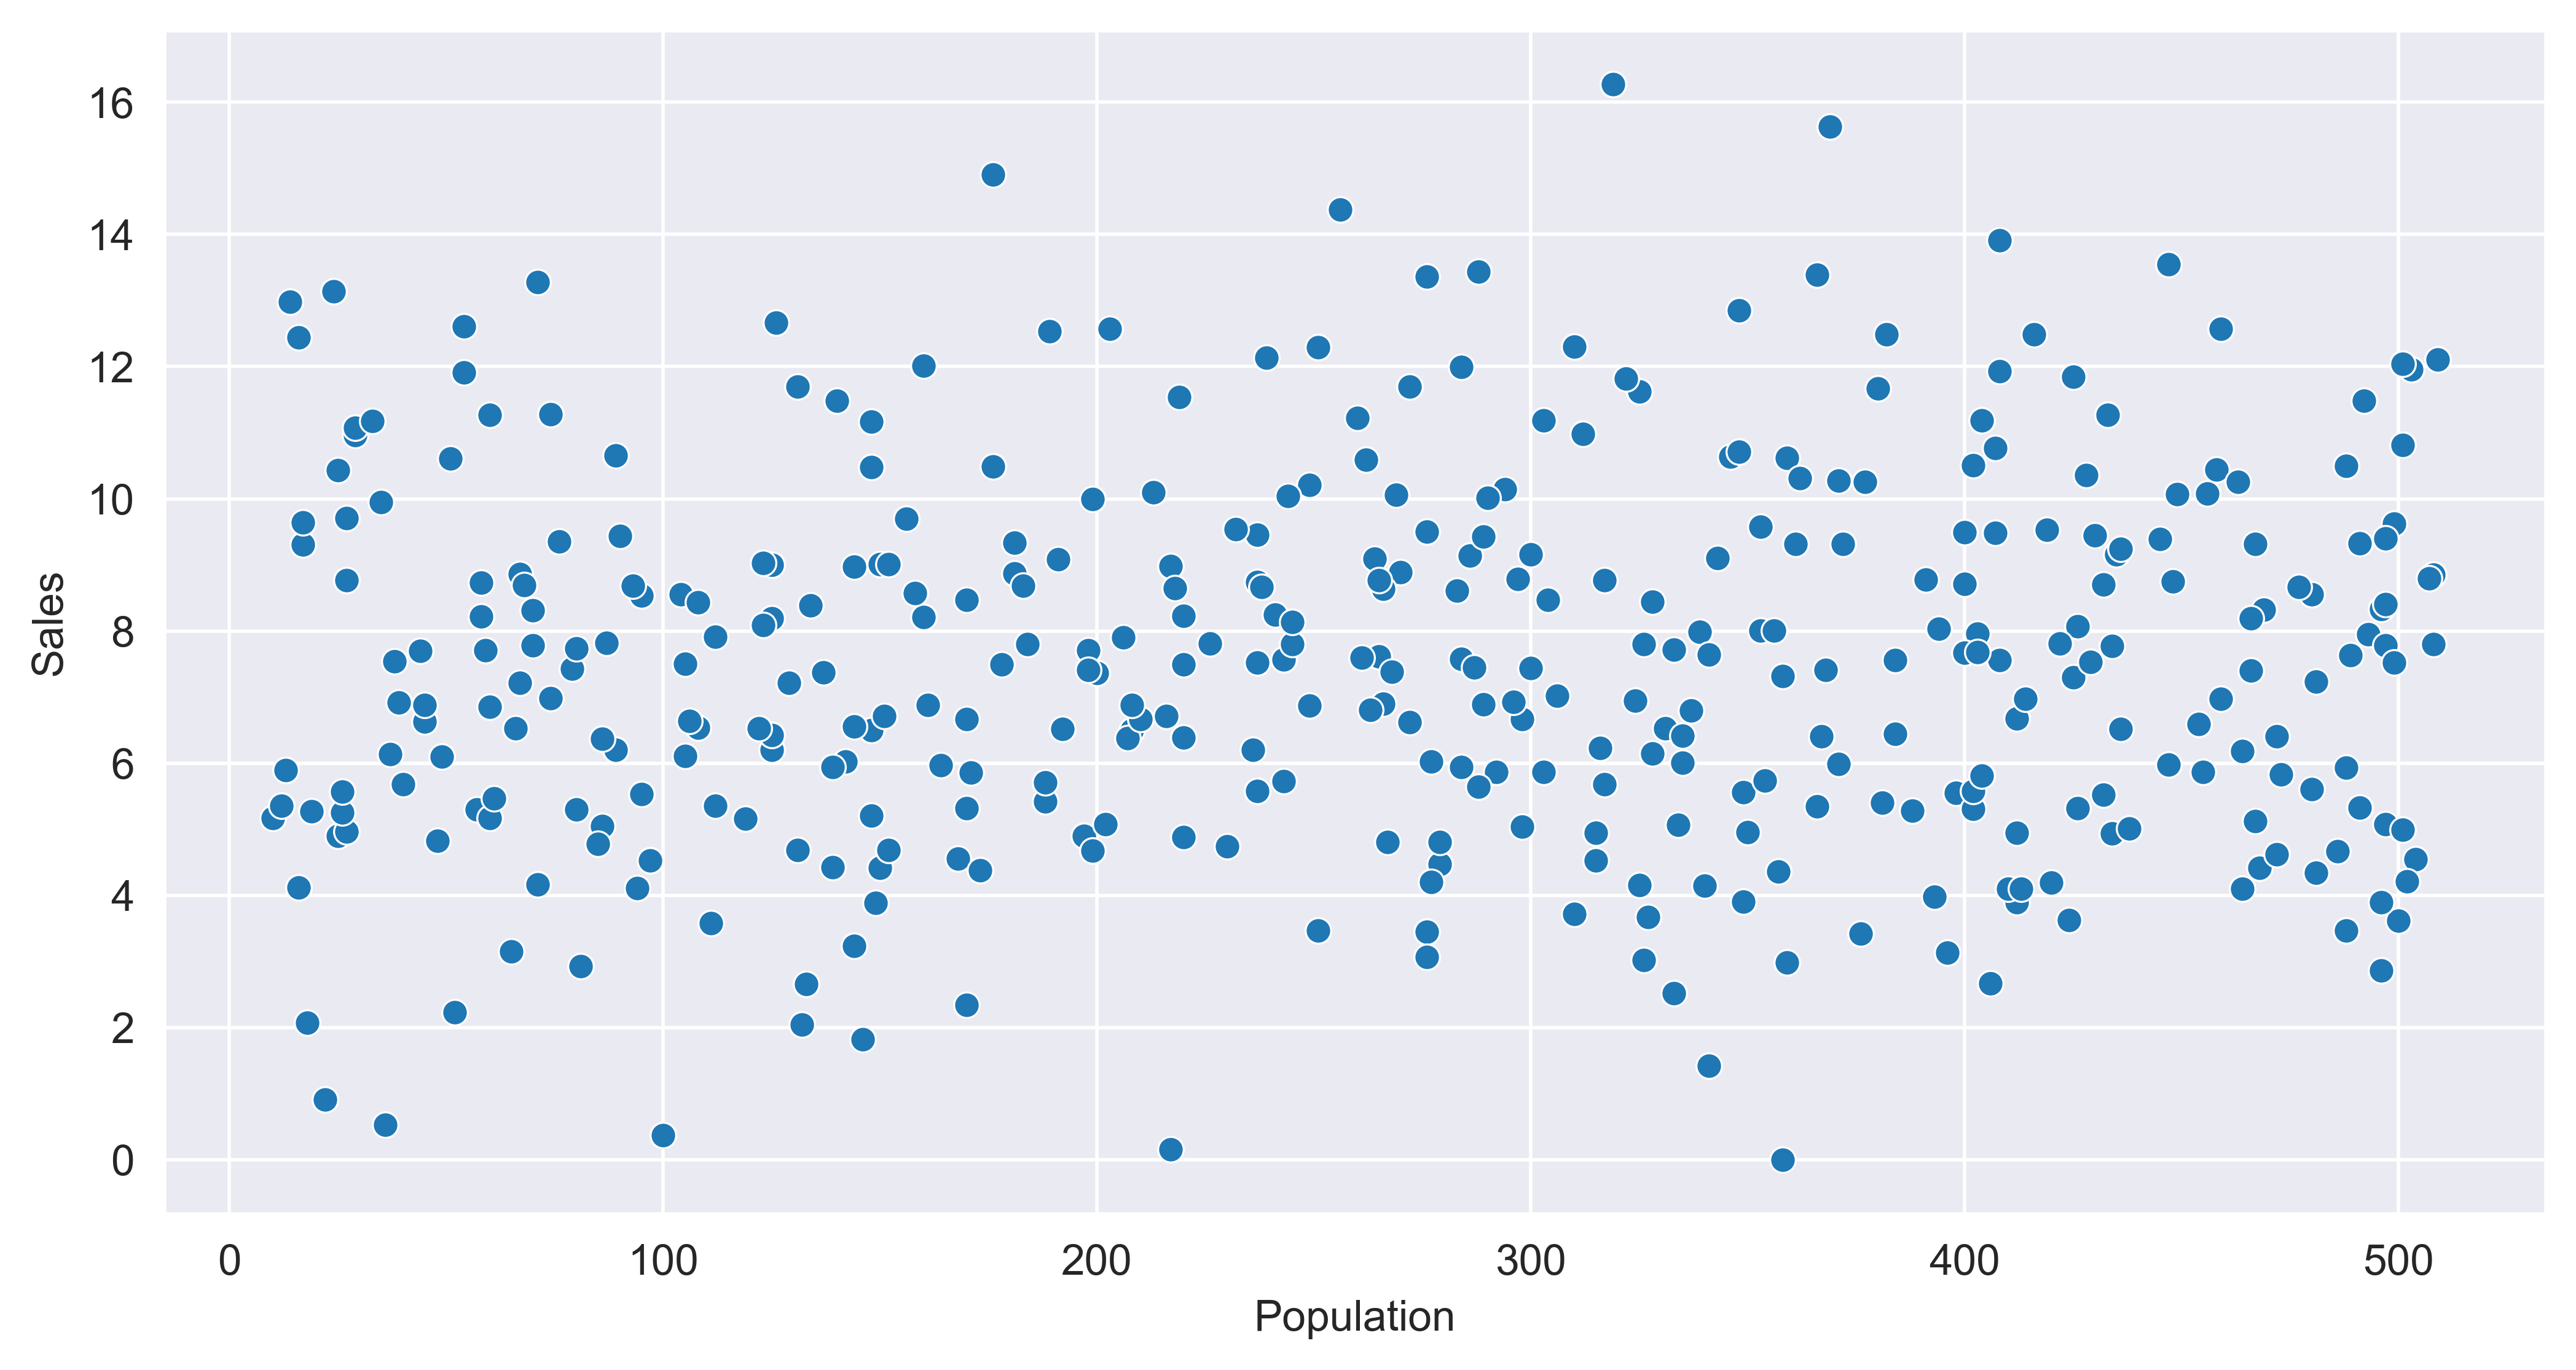

In [9]:
sns.scatterplot(x=df['Population'],y=df['Sales'])

<Axes: xlabel='Urban_Yes', ylabel='count'>

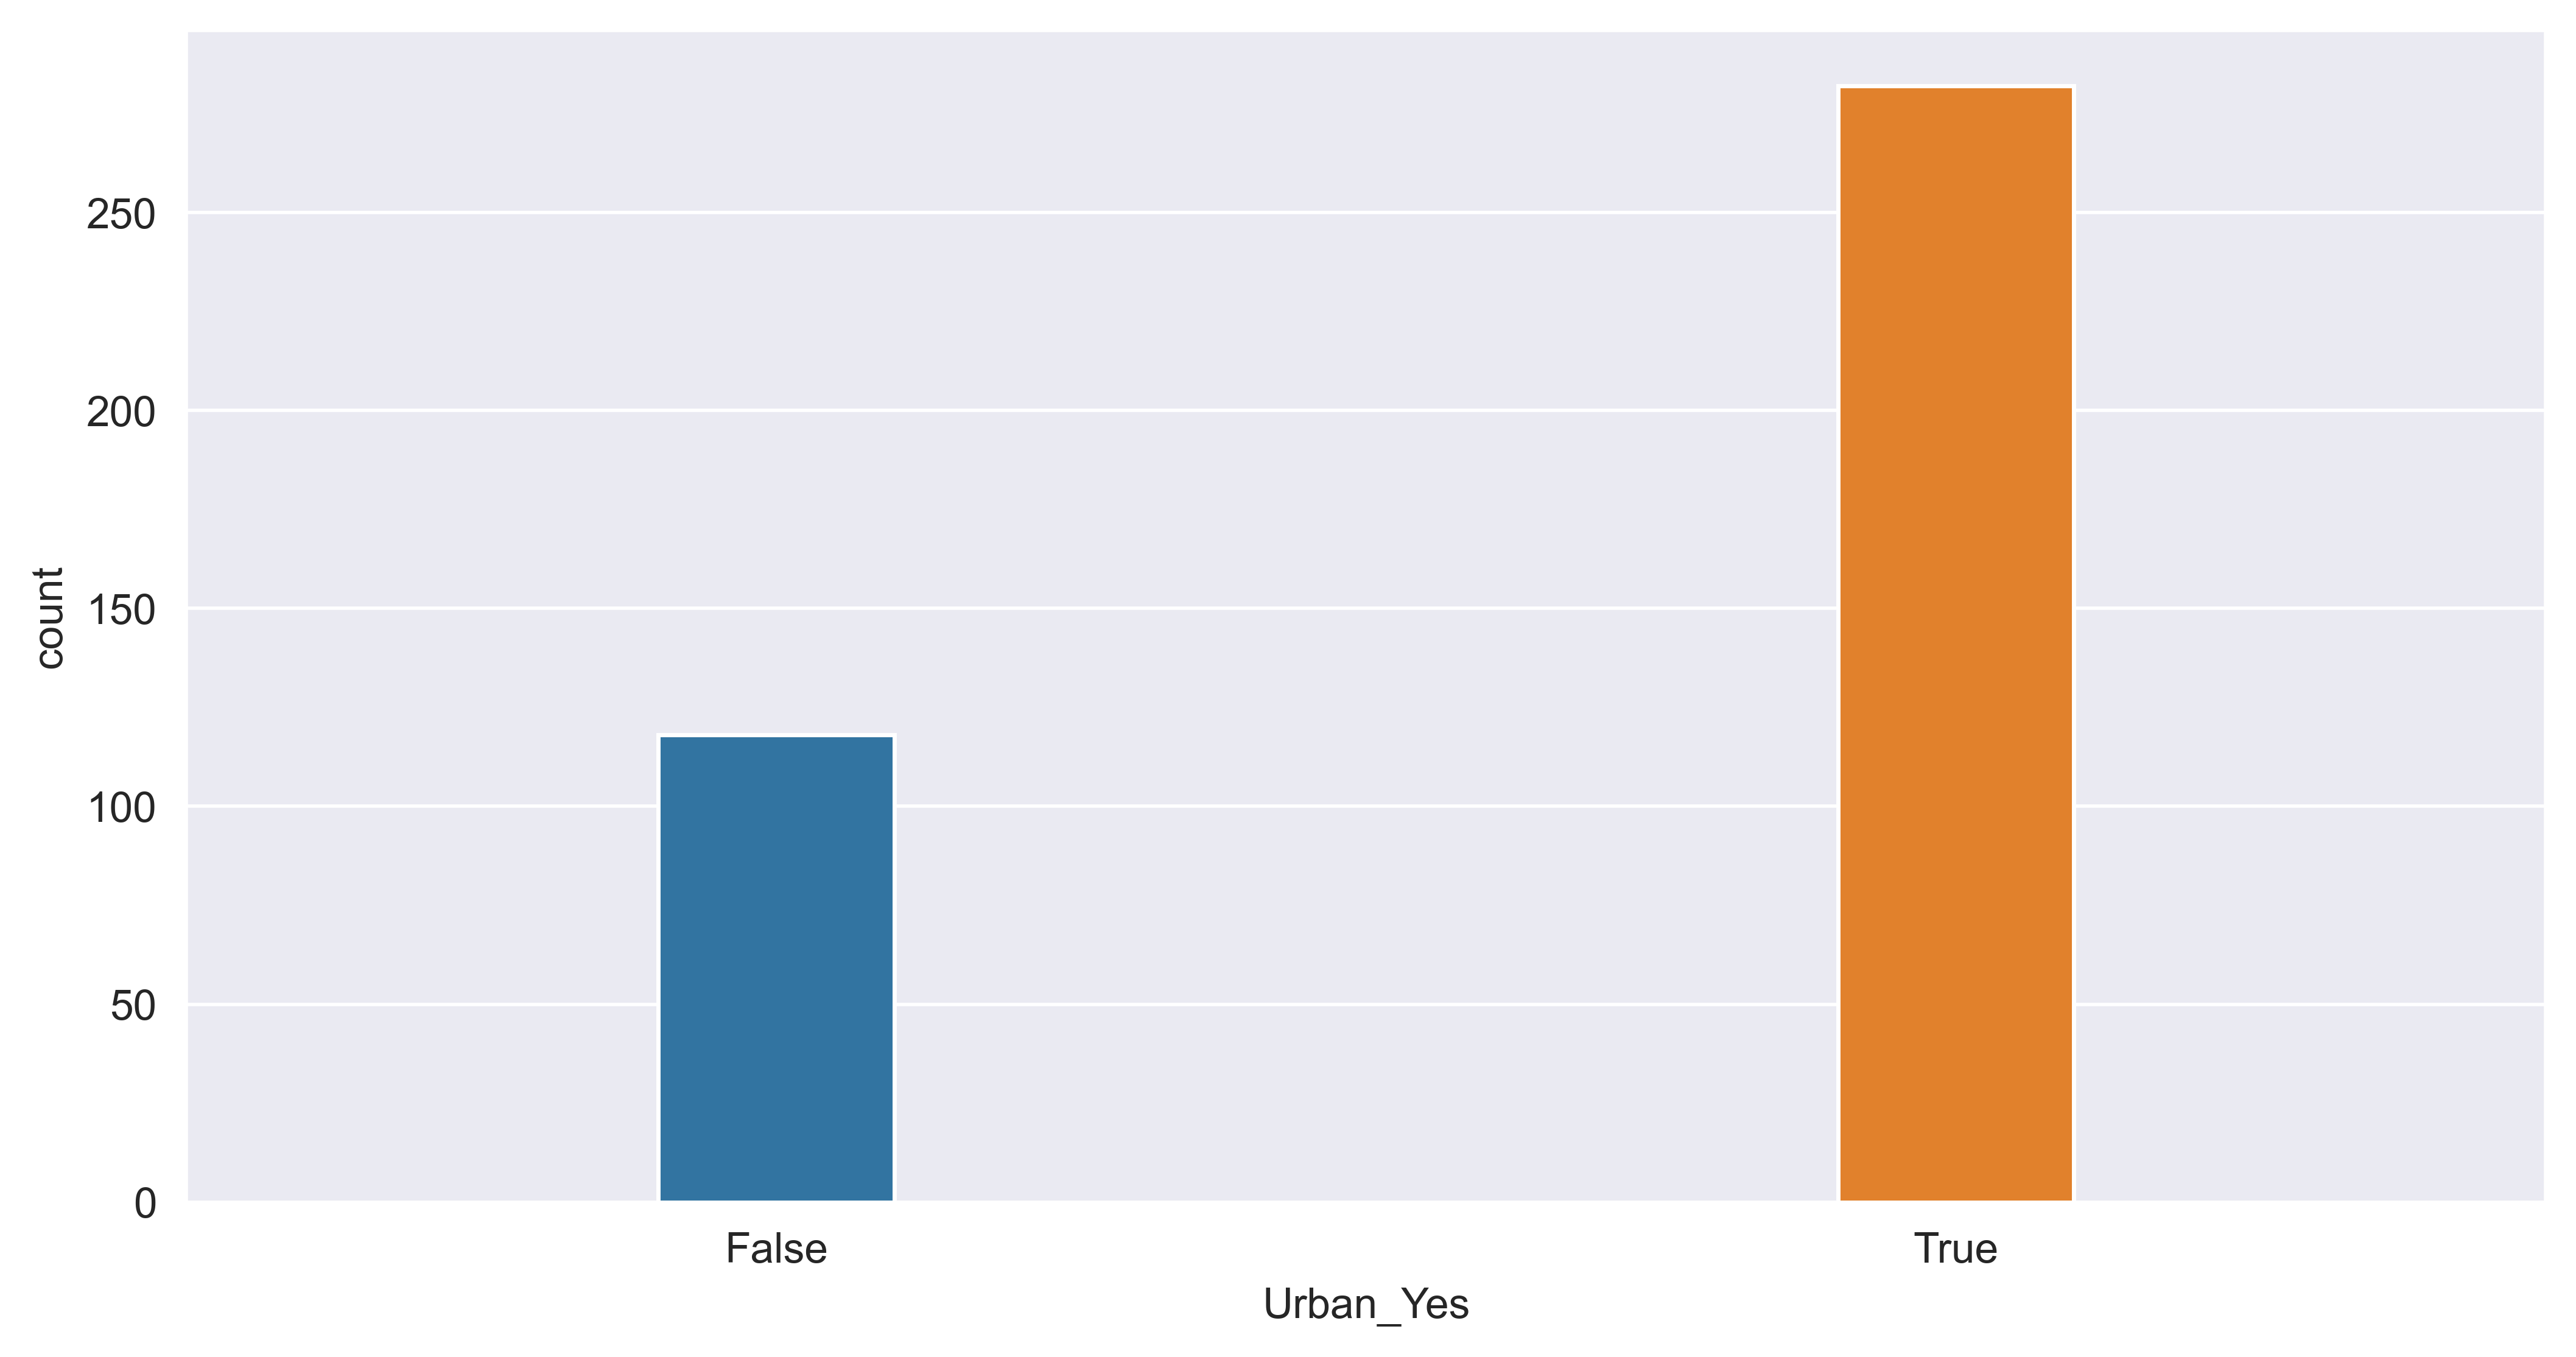

In [10]:
sns.countplot(data=df,x='Urban_Yes',width=0.2)

<Axes: xlabel='US_Yes', ylabel='count'>

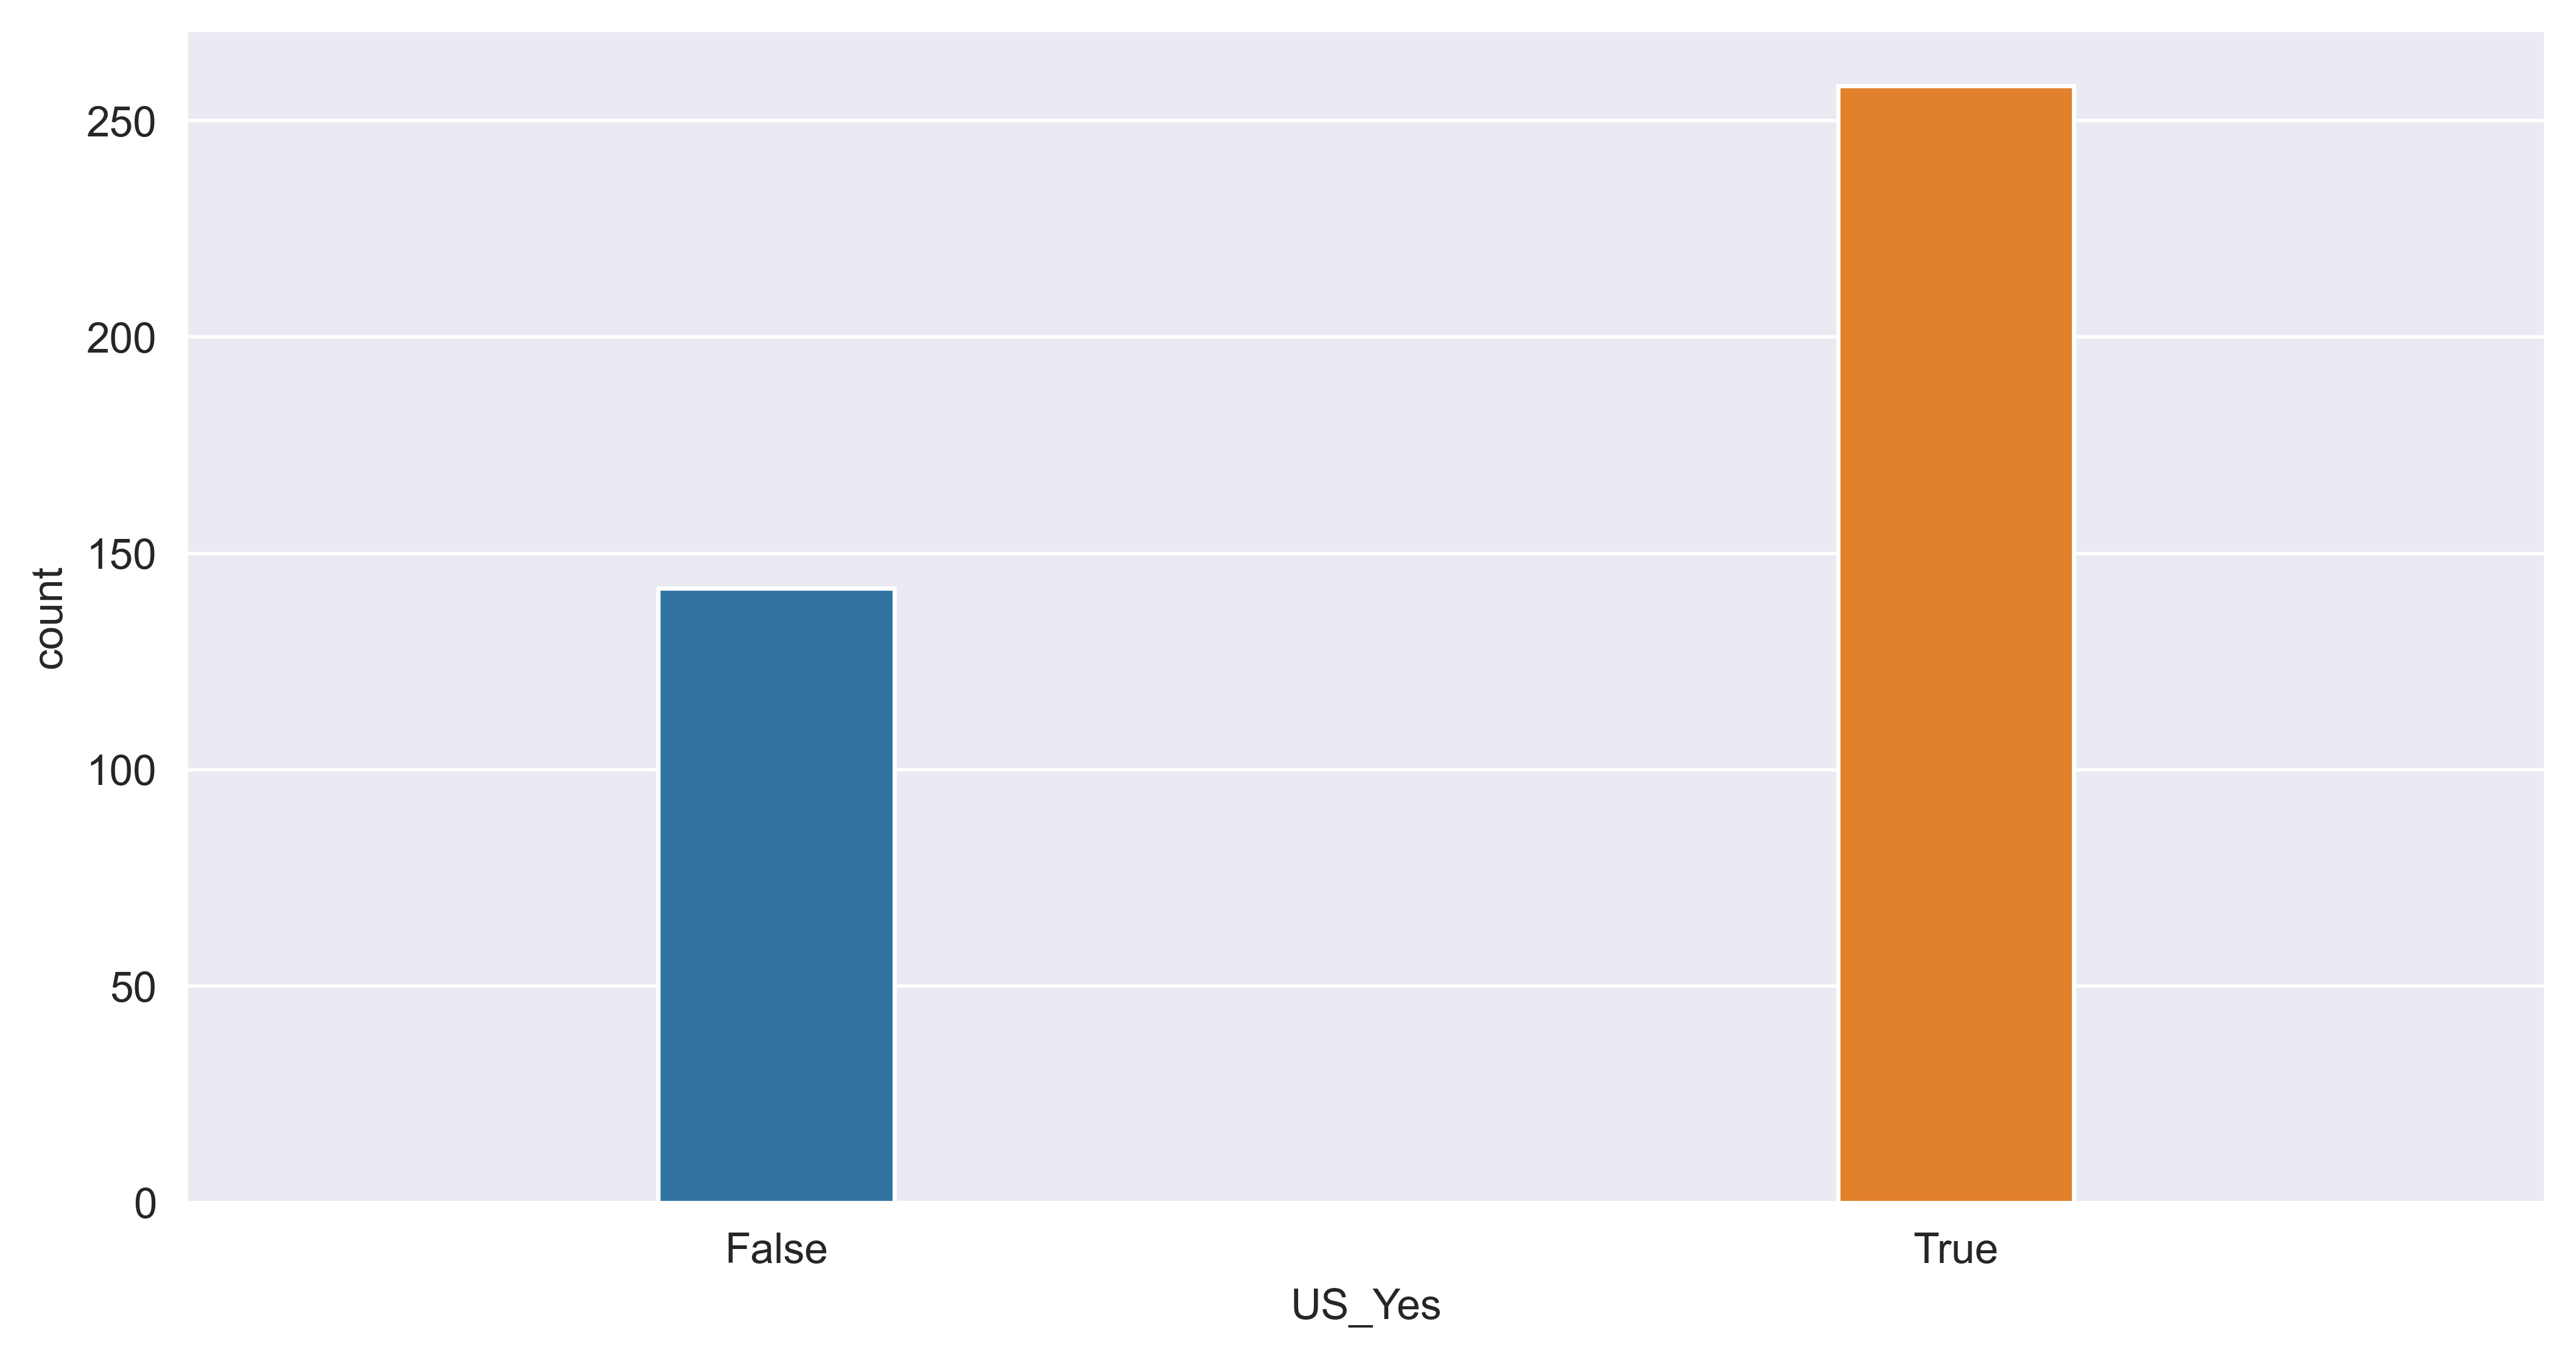

In [11]:
sns.countplot(data=df,x='US_Yes',width=0.2)

# 4 - Decision Tree

In [12]:
# split the feature and target
X = df.drop('Sales',axis=1)
Y = df['Sales']

In [13]:
# split train test 
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.1,random_state=42)

In [14]:
dt_c5r = DecisionTreeRegressor().fit(xtrain,ytrain)

In [15]:
print('Training accuracy: ', dt_c5r.score(xtrain,ytrain))
print('Testing Accuracy: ', dt_c5r.score(xtest,ytest))

Training accuracy:  1.0
Testing Accuracy:  0.5909452467670362


# 5 - Hyper Parameter Tuning

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
params = {
    'criterion' : ['squared_error', 'absolute_error','friedman_mse'],
    'max_depth' : [None,17,15,20],
    'splitter' : ['best','random'],
    'max_features' : ['sqrt', 'log2'],
    'ccp_alpha' : [0,0.01,0.1,1]
}
grid = GridSearchCV(DecisionTreeRegressor(),params,verbose=1).fit(xtrain,ytrain)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


In [18]:
grid.best_score_ , grid.best_params_ 

(0.3712600277447269,
 {'ccp_alpha': 0.1,
  'criterion': 'squared_error',
  'max_depth': None,
  'max_features': 'log2',
  'splitter': 'best'})

In [19]:
grid.best_estimator_.score(xtest,ytest)

0.398219307616424

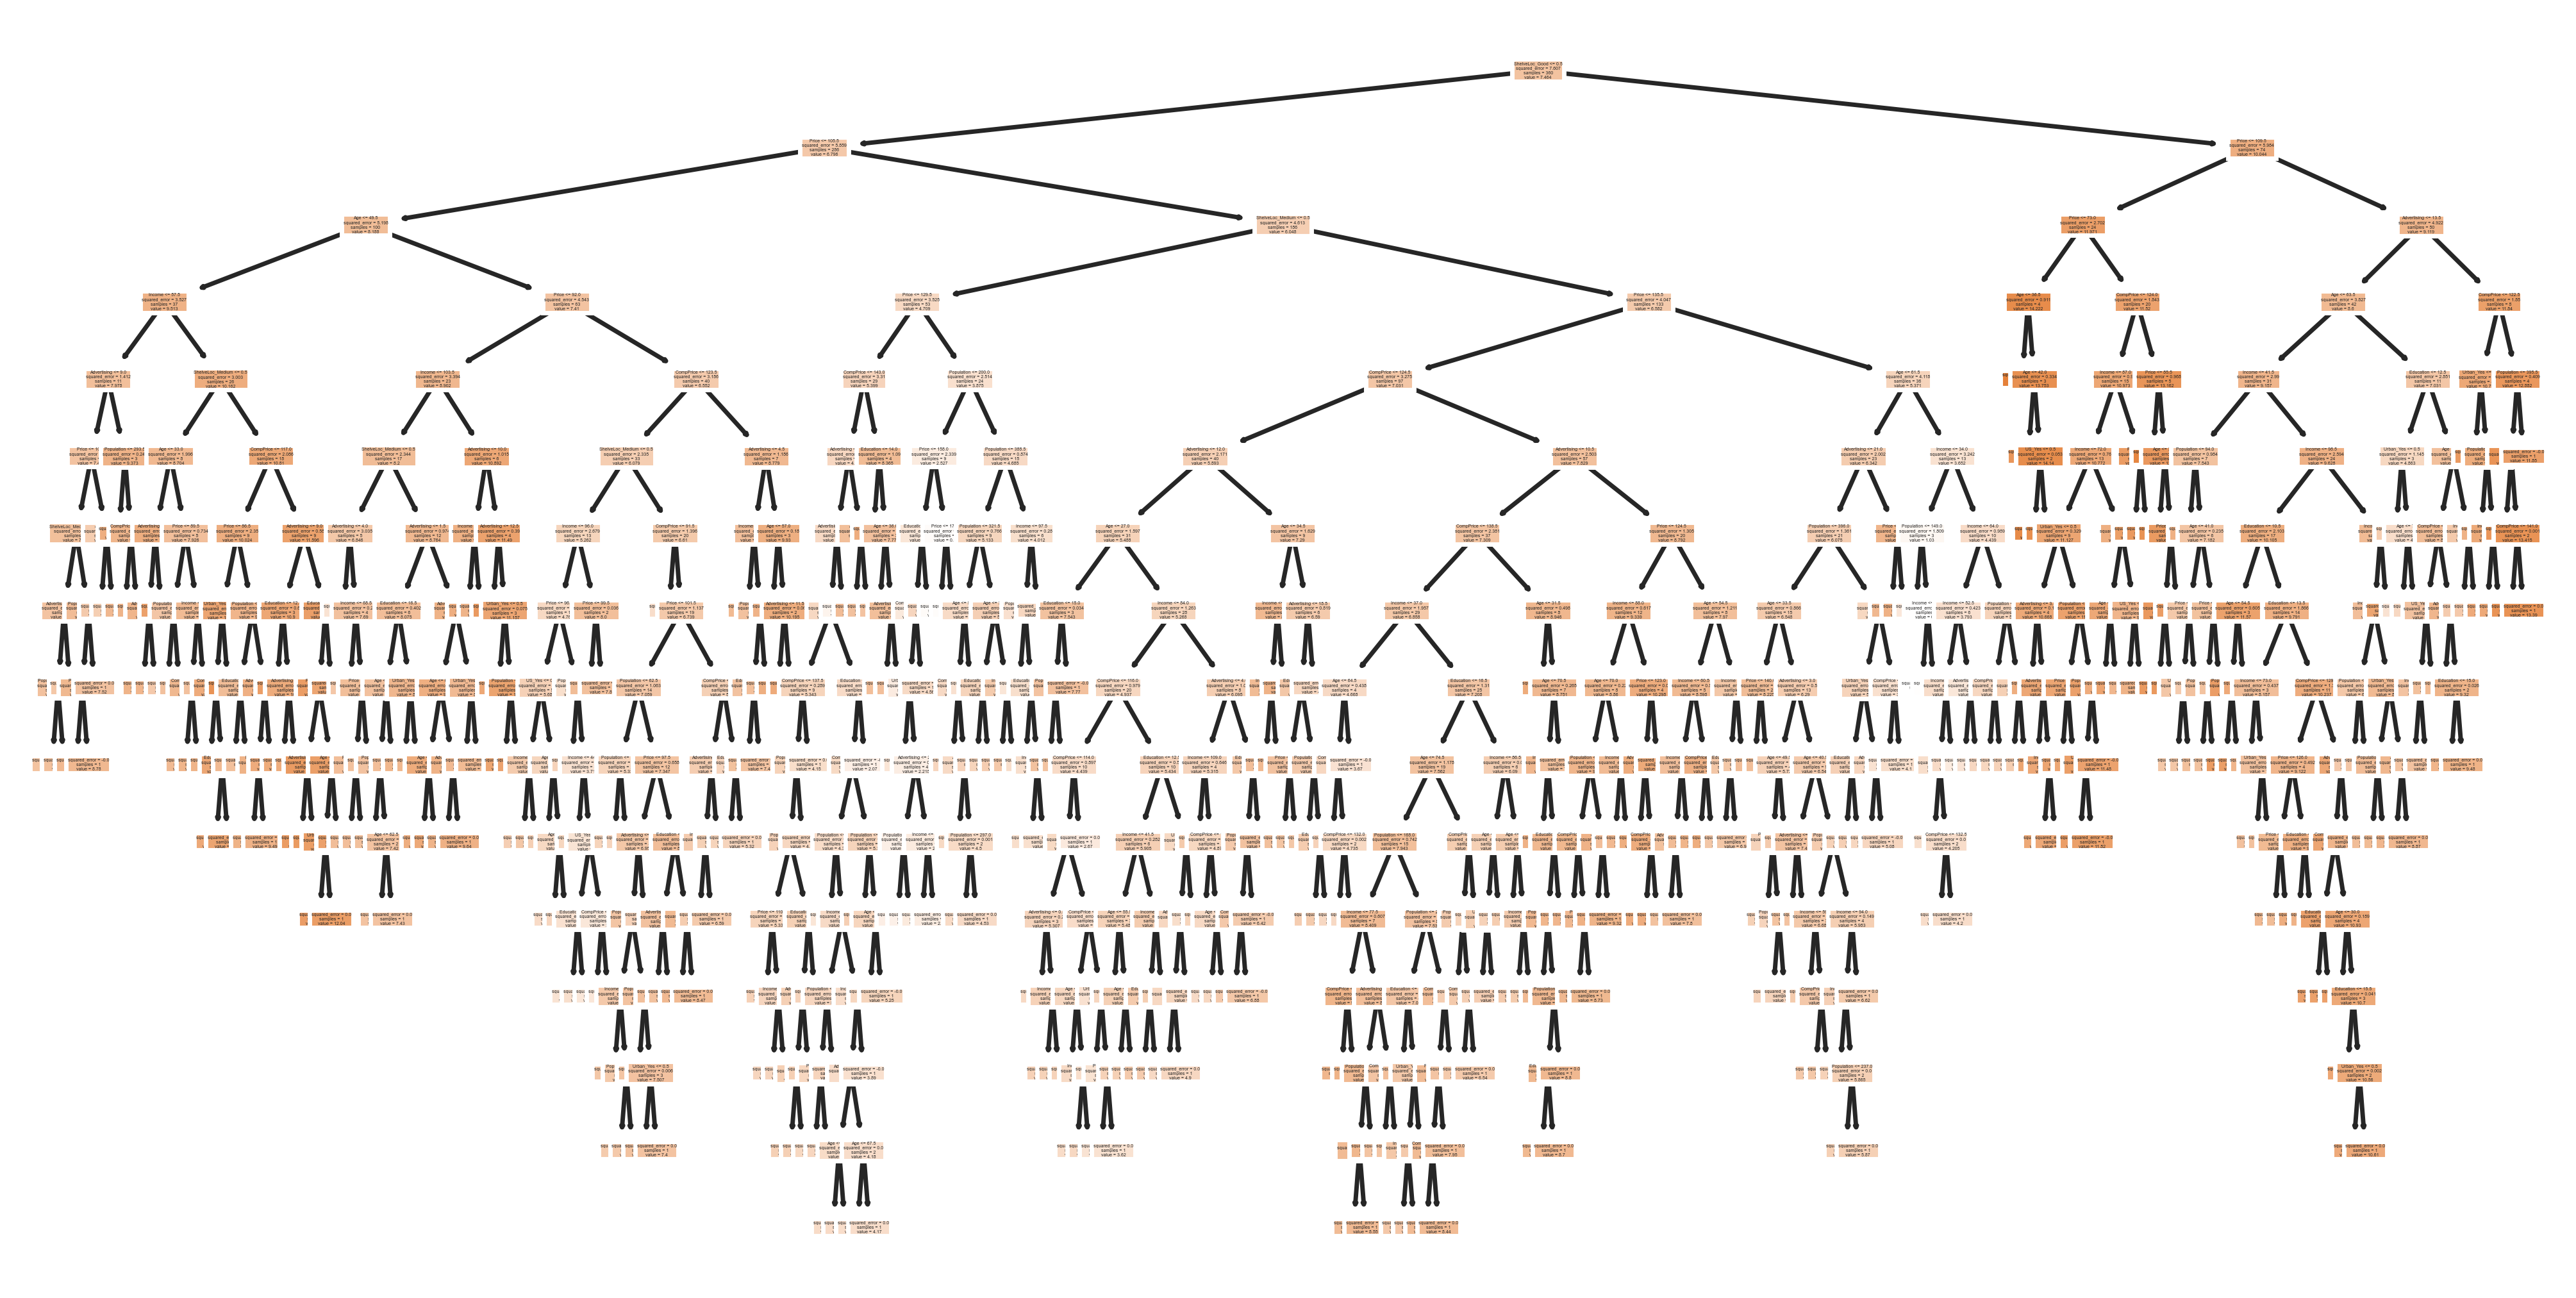

In [23]:
feature_names = list(X.columns)  # Convert Index to a list
tree.plot_tree(dt_c5r, feature_names=feature_names, filled=True)
plt.show()

<h2 style="color:blue; font-family: Arial;">Conclusion:</h2>

<h3 style="color:black; font-family: Arial;"> The Default tree gives the best performance</h3>

# 6 - Feature Importance

In [24]:
dt_c5r.feature_importances_

array([0.10157447, 0.08645033, 0.08835266, 0.03205019, 0.25457595,
       0.10750861, 0.02765072, 0.22640757, 0.06795914, 0.00620037,
       0.00127   ])

In [25]:
feature_df = pd.DataFrame({'Feature':X.columns,
                          'Importance':dt_c5r.feature_importances_})
feature_df.sort_values('Importance',ascending=False,inplace=True)

In [26]:
feature_df

,Feature,Importance
4,Price,0.254576
7,ShelveLoc_Good,0.226408
5,Age,0.107509
0,CompPrice,0.101574
2,Advertising,0.088353
1,Income,0.086450
8,ShelveLoc_Medium,0.067959
3,Population,0.032050
6,Education,0.027651
9,Urban_Yes,0.006200


<Axes: xlabel='Importance', ylabel='Feature'>

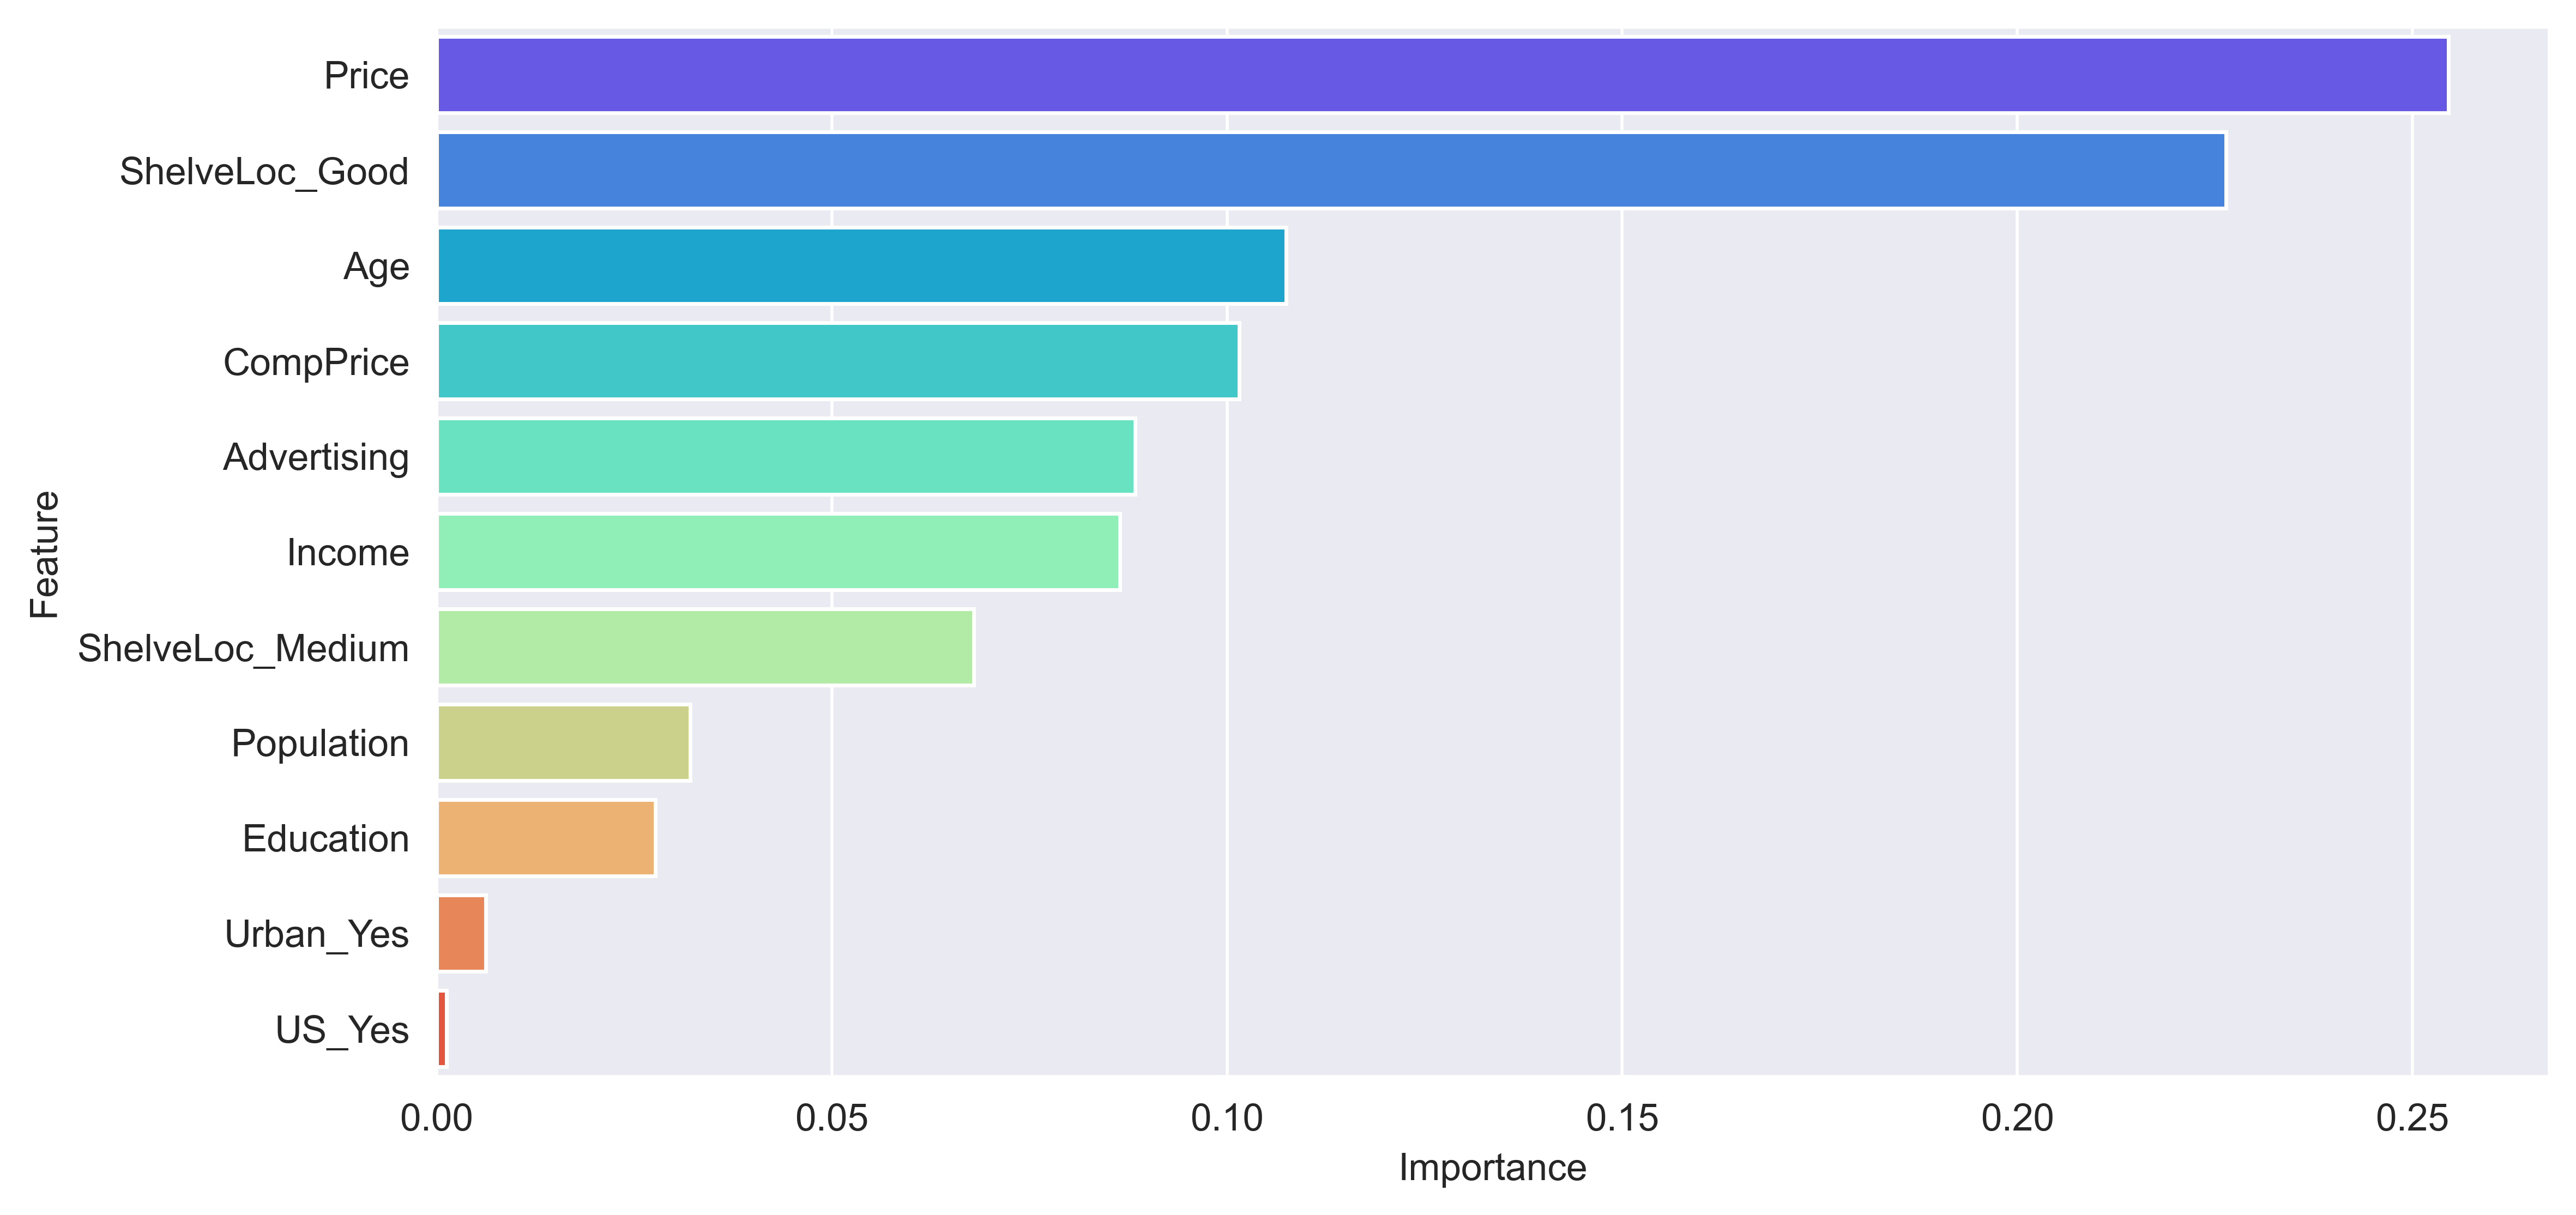

In [27]:
sns.barplot(data=feature_df,y='Feature',x='Importance',palette='rainbow')

# 7 - Final Conclusion

<h3 style="color:blue; font-family: Arial;">Price has the highest importance.</h3>
<h3 style="color:blue; font-family: Arial;">Top 3 features that affect sales are Price , ShelveLoc_Good and Age</h3>